# K Nearest Neighbour classification and K means clustering

## 1. What is the difference between classification and clustering?

|Parameter	| Classification |	Clustering|
| --- | --- | --- |
|Type|	Used for supervised learning.|	Used for unsupervised learning.|
|Basic|	Process of classifying the input instances based on their corresponding class labels.|	Grouping the instances based on their similarity without the help of class labels.|
|Need|	It has labels so there is need of training and testing dataset for verifying the model created.| There is no need of training and testing dataset.|
|Complexity| More complex as compared to clustering.| Less complex as compared to classification.|
|Example Algorithms | Logistic regression, Naive Bayes classifier, Support vector machines, etc.|k-means clustering algorithm, Fuzzy c-means clustering algorithm, Gaussian (EM) clustering algorithm, etc.|

## 2. Explain in brief the working of KNN

K-Nearest Neighbor also known as KNN is a supervised learning algorithm that can be used for regression as well as classification problems. Generally, it is used for classification problems in machine learning. 

KNN works on a principle assuming every data point falling in near to each other is falling in the same class. In other words, it classifies a new data point based on similarity. 

The below graph shows two classes red and green and a black data point which is to be classified by the algorithm either red or green. But how is it computed by the KNN algorithm?

KNN algorithms decide a number k which is the nearest Neighbor to that data point that is to be classified.

In this example, if we assume k=4. KNN finds out about the 4 nearest Neighbors. All the data points near black data points belong to the green class meaning all the neighbours belong to the green class so according to the KNN algorithm, it will belong to this class only. The red class is not considered because red class data points are nowhere close to the black data point. 

The simple version of the K-nearest neighbour classifier algorithms is to predict the target label by finding the nearest neighbour class. The closest class to the point which is to be classified is calculated using Euclidean distance. 


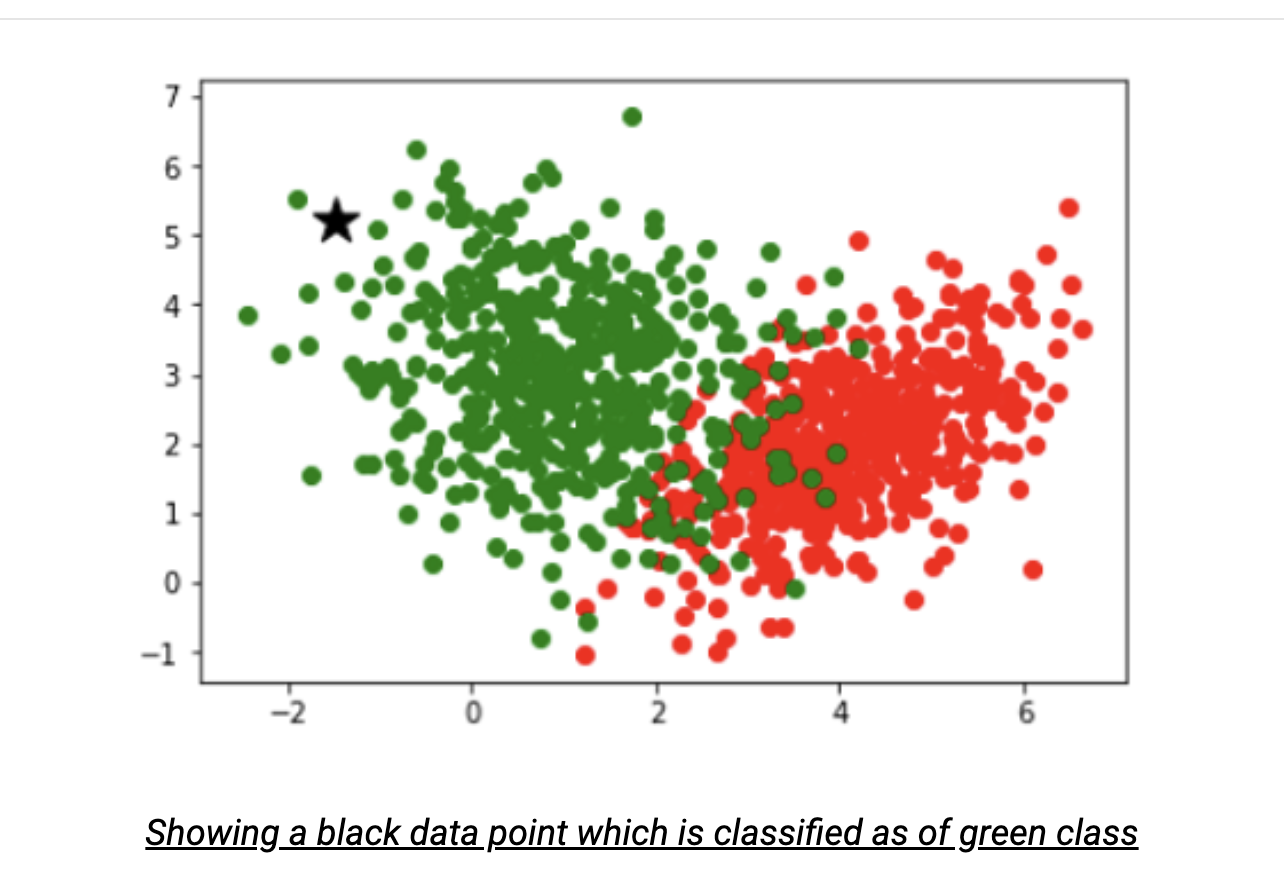

## 3. Explain in brief the working of K means

K means is a partitional clustering algorithm. The k means algorithm partitions the given data into k clusters. Each cluster has a cluster center called centroid. k is specified by the user.

Given k the k means algorithm works as follows:
1. Choose k (random) data points to be the initial centroids cluster centers.
2. Assign each data point to the closest centroid.
3. Re compute the centroids using the current cluster memberships
4. If a convergence criterion is not met, repeat steps 2 and 3

Algorithm will stop only if: 
1. There are no (or minimum) re assignments of data points to different clusters, or
2. There is no (or minimum) change of centroids, or
3. There is minimum decrease in the sum of squared error.

k is chosen using elbow method:

If you plot k against the SSE, you will see that the error decreases as k gets larger ; this is because when the number of clusters increases, they should be smaller, so distortion is also smaller. The idea of the elbow method is to choose the k at which the SSE decreases abruptly.

## 4. What is the meaning of K in KNN and K means

##### KNN
KNN algorithms decide a number k which is the nearest Neighbor to that data point that is to be classified. If the value of k is 5 it will look for 5 nearest Neighbors to that data point. 
##### K-means
A K-means clustering algorithm tries to group similar items in the form of clusters. The number of groups is represented by K.

## 5. Explain any 5 distance metrics in short.

1. Euclidean Distance:

    It measures the length of a segment connecting two points. The formula is the distance is calculated from the cartesian coordinates of the points using the Pythagorean theorem.

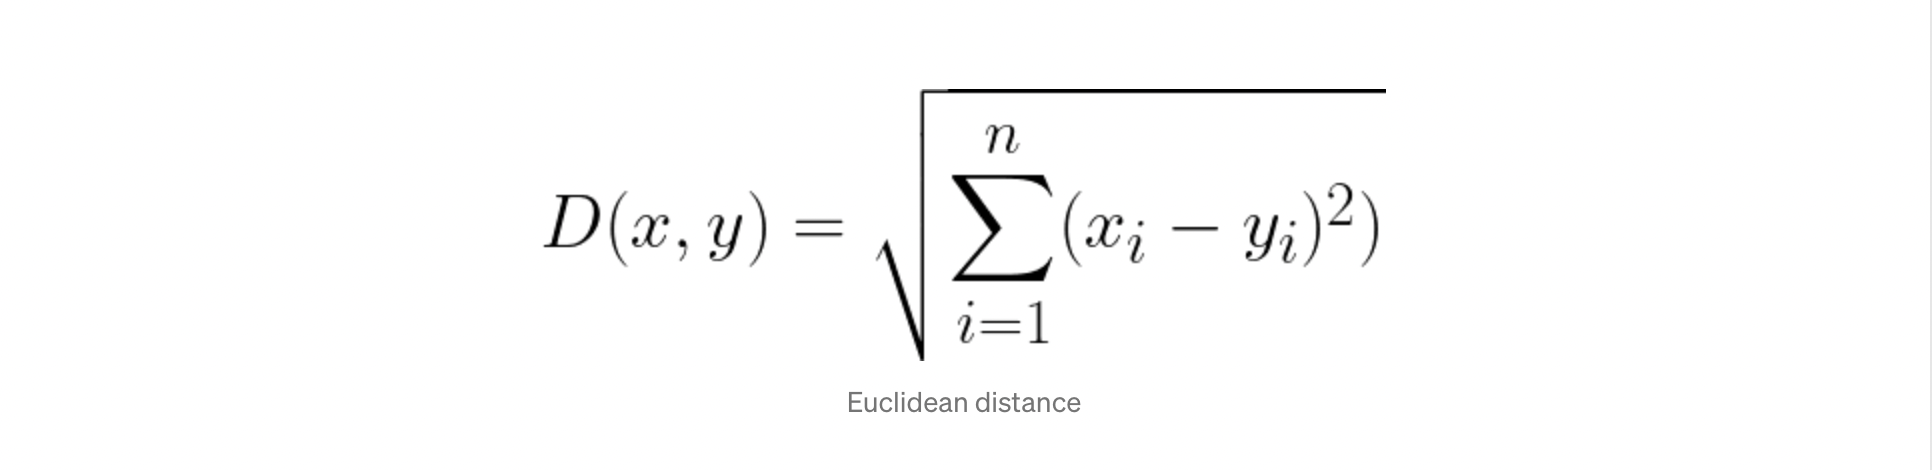

2. Hamming Distance

    Hamming distance is the number of values that are different between two vectors. It is typically used to compare two binary strings of equal length. It can also be used for strings to compare how similar they are to each other by calculating the number of characters that are different from each other. You can also use Hamming distance to measure the distance between categorical variables.

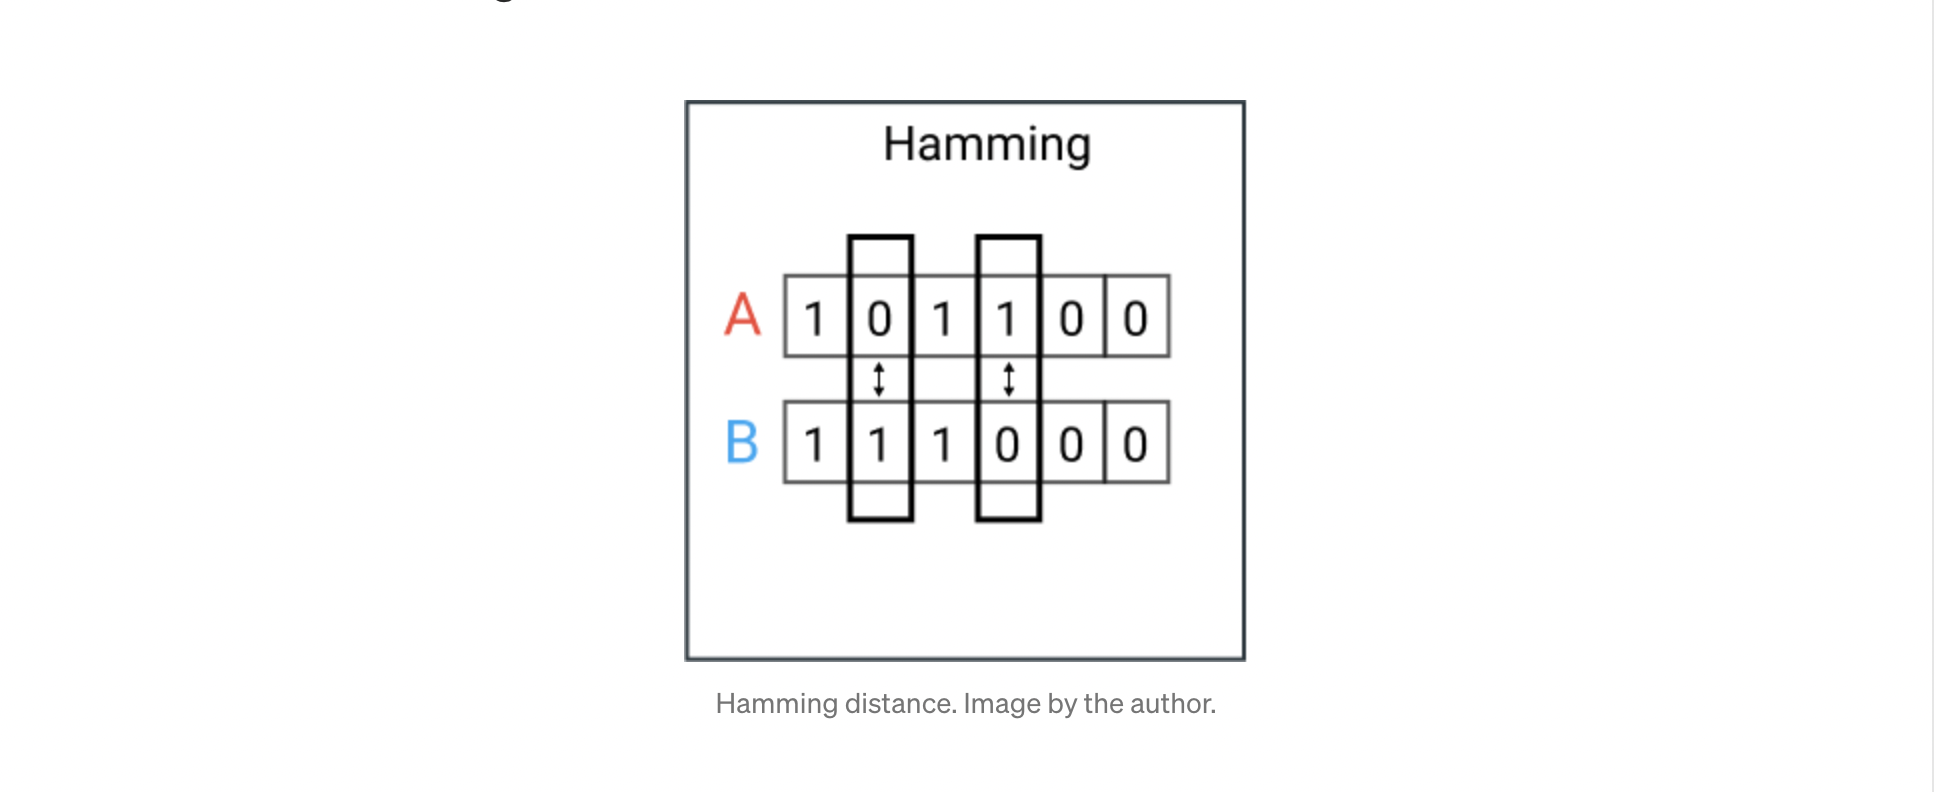

3. Manhattan distance

    The Manhattan distance, often called Taxicab distance or City Block distance, calculates the distance between real-valued vectors. Manhattan distance refers to the distance between two vectors if they could only move right angles. There is no diagonal movement involved in calculating the distance.


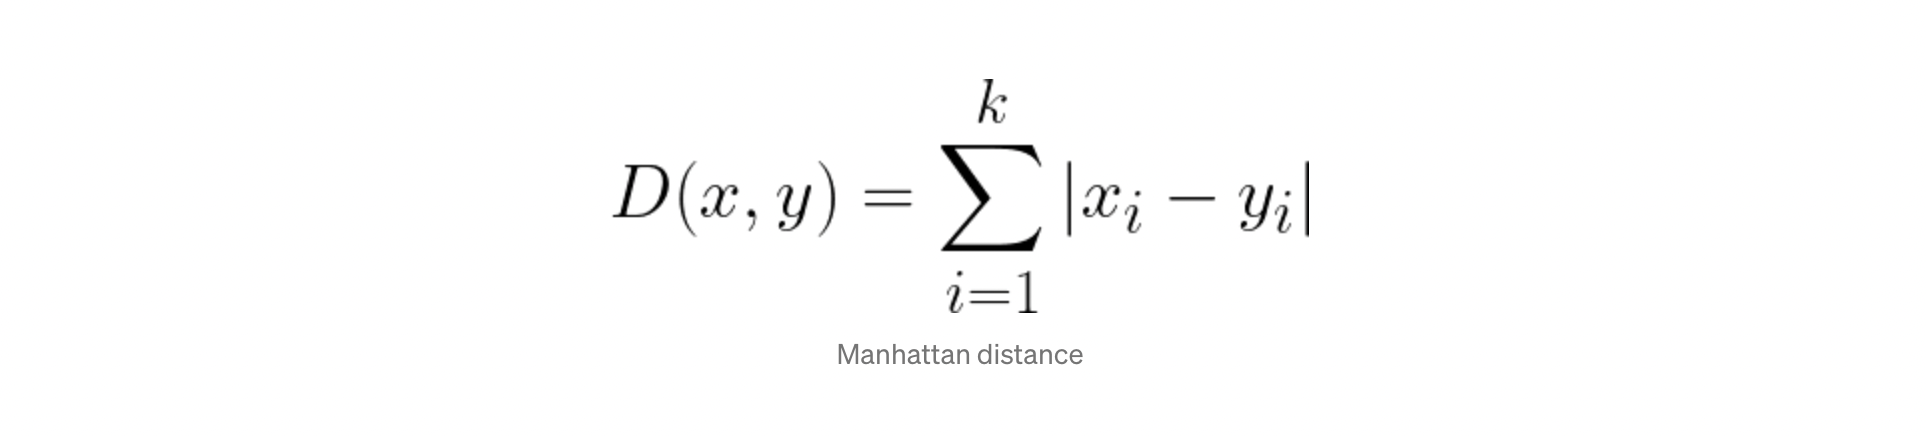

4. Chebyshev distance

    Chebyshev distance is defined as the greatest of difference between two vectors along any coordinate dimension. In other words, it is simply the maximum distance along one axis. Due to its nature, it is often referred to as Chessboard distance since the minimum number of moves needed by a king to go from one square to another is equal to Chebyshev distance.

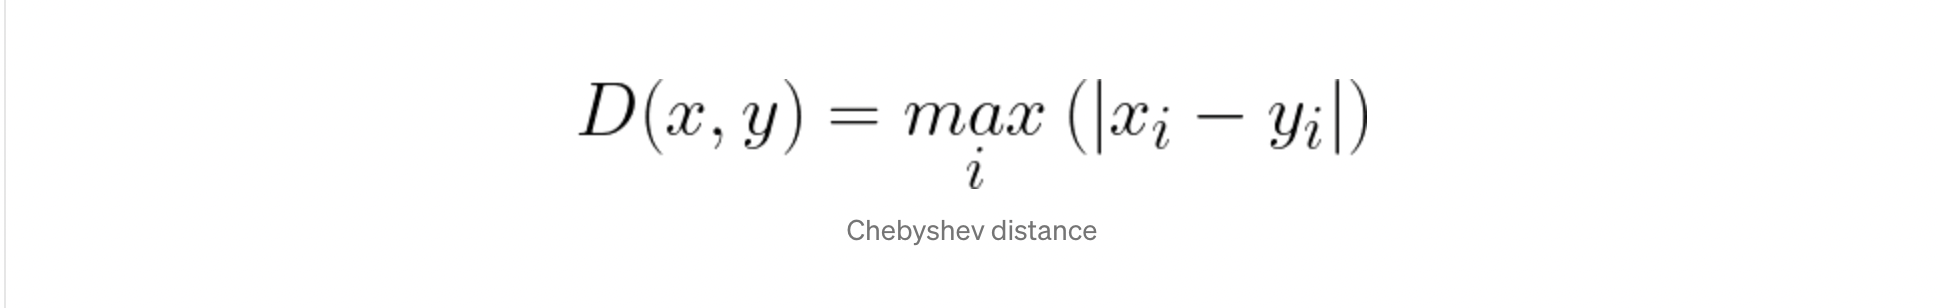

5. Haversine distance 

    Haversine distance is the distance between two points on a sphere given their longitudes and latitudes. It is very similar to Euclidean distance in that it calculates the shortest line between two points. The main difference is that no straight line is possible since the assumption here is that the two points are on a sphere.
    
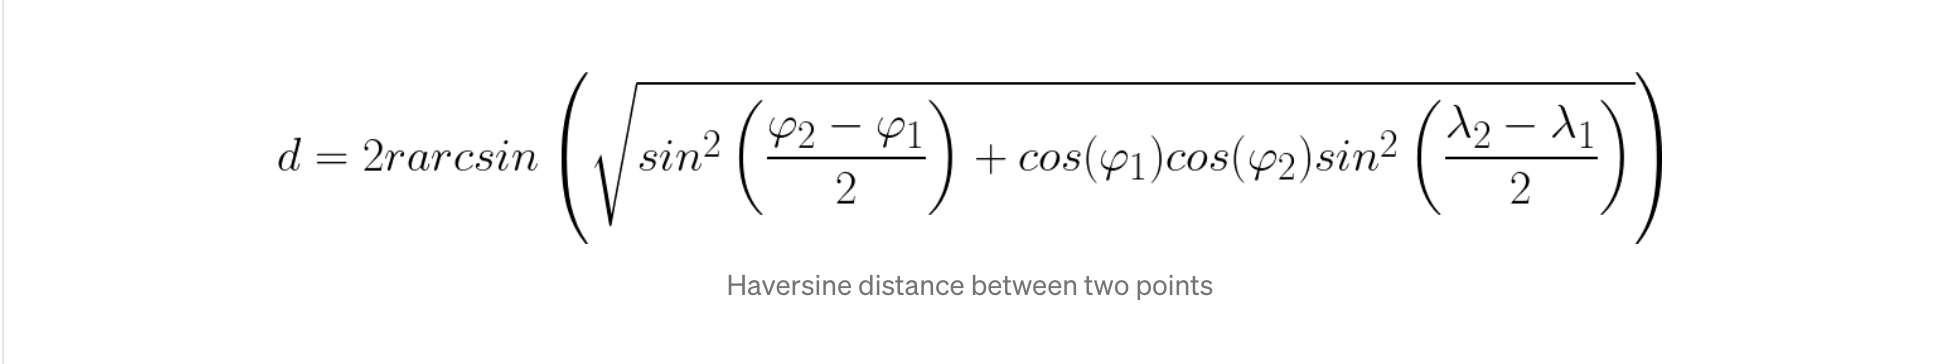

## 6. load and plot the dataset S1.txt file (comment how many natural classes you see)

In [1]:
# importing pandas
import pandas as pd
  
# read text file into pandas DataFrame
df = pd.read_csv("S1.txt", header=None)
  
# display DataFrame
print(df)

                         0
0         664159    550946
1         665845    557965
2         597173    575538
3         618600    551446
4         635690    608046
...                    ...
4995      665426    853940
4996      691827    863963
4997      650661    861267
4998      599647    858702
4999      684091    842566

[5000 rows x 1 columns]


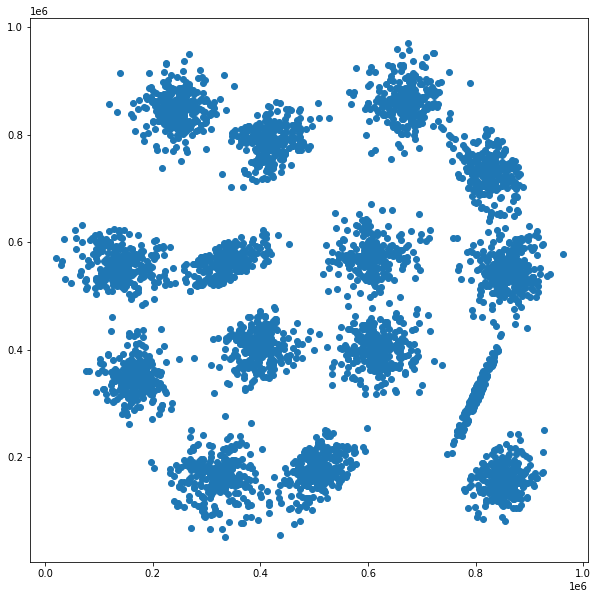

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = []
X = []
Y = []

for line in open('S1.txt'):
    line = line.rstrip().strip()
    dpoint = [int(i) for i in line.split()]
    X.append(dpoint[0])
    Y.append(dpoint[1])
    data.append(dpoint)

plt.figure(figsize=(10,10))
plt.scatter(X,Y)
plt.show()

There are about 15 natural classes that can be observed.

## 7. load the labels for the dataset and perform classification using KNN algorithm without using any library

In [3]:
labels =[]
for line in open('S1-labels.pa'):
    label = line.rstrip()
    labels.append((label))
dfn = pd.DataFrame(labels)

In [4]:
dfn.head()

,0
0,VQ PARTITIONING 2.0
1,15
2,5000
3,DataGen
4,-------------------------------------


In [5]:
dfn[0].unique()


array(['VQ PARTITIONING 2.0', '15', '5000', 'DataGen',
       '-------------------------------------', '1', '2', '3', '4', '5',
       '6', '7', '8', '9', '10', '11', '12', '13', '14'], dtype=object)

In [6]:
dfn.drop(dfn.index[dfn[0] == 'VQ PARTITIONING 2.0'], inplace=True)
dfn.drop(dfn.index[dfn[0] == '5000'], inplace=True)
dfn.drop(dfn.index[dfn[0] == 'DataGen'], inplace=True)
dfn.drop(dfn.index[dfn[0] == '-------------------------------------'], inplace=True)
dfn

,0
1,15
5,1
6,1
7,1
8,1
...,...
5000,15
5001,15
5002,15
5003,15


In [7]:
dfn[0]= dfn[0].astype(int)

In [8]:
labeln = dfn.values.tolist()

In [9]:
x_train, x_test, y_train, y_test = train_test_split(data,labeln[1:],test_size=0.2)

# print(x_train)
# print(y_train)
# print(x_test)
# print(y_test)

In [10]:
from math import sqrt

train_data = x_train

for i in range(len(train_data)):
    train_data[i].append(y_train[i])

test_data = x_test

for i in range(len(test_data)):
    test_data[i].append(y_test[i])

def euclidean_distance(v1,v2):
    ED = 0
    for i in range(2):
        ED = ED + (v1[i]-v2[i])**2
    return sqrt(ED)


def neighbors(train_data, test, n):
    distances = []
    for train_row in train_data:
        distance = euclidean_distance(train_row,test)
        distances.append((train_row,distance))
    distances.sort(key=lambda tup:tup[1])
    neighbors_list = []
    for i in range(n):
        neighbors_list.append(distances[i][0])
    return neighbors_list

def predict_knn(train, test_row, n):
    neighbors_list = neighbors(train, test_row, n)
    return neighbors_list[0][2]

y_pred_own_knn = []

for i in test_data:
    predicted = predict_knn(train_data,i,3)
    y_pred_own_knn.append(predicted)

print(y_pred_own_knn)

from sklearn.metrics import accuracy_score
print("Accuracy of manual implementation of KNN is {} ".format(accuracy_score(y_test, y_pred_own_knn)))

[[11], [8], [3], [8], [5], [12], [11], [10], [3], [8], [8], [6], [8], [3], [15], [15], [5], [7], [1], [2], [15], [12], [10], [6], [15], [7], [8], [11], [8], [6], [10], [5], [5], [15], [14], [15], [2], [5], [1], [1], [6], [15], [3], [8], [5], [10], [5], [6], [14], [13], [8], [15], [2], [9], [8], [1], [6], [7], [12], [6], [9], [3], [5], [6], [7], [9], [8], [11], [13], [4], [13], [13], [7], [14], [2], [5], [2], [11], [2], [7], [14], [13], [6], [3], [8], [13], [8], [12], [1], [3], [12], [12], [6], [14], [5], [3], [10], [11], [13], [13], [5], [14], [3], [4], [5], [3], [1], [6], [14], [14], [3], [4], [6], [4], [12], [1], [10], [12], [9], [1], [12], [13], [10], [8], [13], [6], [8], [10], [6], [3], [13], [15], [7], [7], [7], [15], [7], [2], [4], [15], [8], [14], [10], [10], [8], [13], [1], [9], [8], [13], [6], [14], [8], [14], [11], [4], [9], [15], [13], [2], [4], [12], [12], [9], [5], [6], [5], [4], [7], [7], [12], [10], [3], [5], [9], [11], [9], [11], [13], [1], [6], [15], [14], [6], [14], [

## 8. perform classification on the above dataset using KNN from sklearn (try different distance metrics and compare their results)

In [11]:
newx = []
for i in data:
    newx.append([i[0], i[1]])

In [12]:
x_train, x_test, y_train, y_test = train_test_split(newx,labeln[1:],test_size=0.2)

In [13]:
# SKLEARN KNN 
from sklearn.neighbors import KNeighborsClassifier

# x_train = np.array(x_train, dtype=float)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

/Users/shreyahunur/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [14]:
#x_test = x_test.reshape(-1,1)

y_pred_sklearn = knn.predict(x_test)
print(y_pred_sklearn.tolist())

acc = accuracy_score(y_test, y_pred_sklearn)
print("Accuracy of Sklearn KNN Model is {}".format(acc))

[8, 10, 13, 8, 6, 8, 6, 10, 6, 12, 9, 2, 12, 13, 7, 3, 14, 2, 8, 6, 11, 11, 5, 3, 14, 11, 4, 9, 8, 2, 1, 9, 5, 6, 8, 8, 9, 15, 14, 2, 3, 14, 15, 15, 3, 8, 1, 2, 14, 10, 10, 12, 11, 7, 9, 3, 11, 14, 4, 10, 6, 3, 2, 5, 11, 15, 2, 8, 7, 10, 14, 3, 11, 11, 1, 2, 8, 12, 10, 2, 8, 12, 15, 10, 12, 9, 3, 11, 9, 4, 15, 3, 2, 11, 6, 14, 9, 14, 12, 12, 11, 2, 6, 13, 8, 12, 8, 6, 7, 8, 6, 11, 10, 1, 15, 13, 7, 1, 7, 11, 5, 14, 15, 1, 4, 1, 6, 15, 10, 3, 6, 13, 15, 6, 13, 13, 10, 3, 4, 4, 2, 7, 6, 15, 9, 7, 6, 2, 4, 1, 11, 12, 11, 12, 15, 6, 4, 11, 3, 2, 4, 1, 10, 1, 15, 4, 1, 5, 14, 9, 7, 8, 2, 2, 12, 12, 2, 1, 2, 2, 13, 12, 15, 15, 10, 4, 5, 2, 2, 12, 7, 1, 8, 3, 11, 7, 9, 5, 4, 15, 12, 4, 2, 12, 1, 12, 1, 5, 13, 15, 15, 2, 8, 5, 1, 2, 5, 15, 5, 5, 1, 5, 15, 4, 10, 11, 2, 13, 8, 15, 11, 9, 6, 14, 13, 13, 11, 10, 2, 5, 3, 3, 7, 10, 14, 11, 4, 9, 11, 13, 13, 6, 13, 13, 6, 4, 8, 6, 14, 13, 5, 11, 13, 13, 10, 11, 6, 3, 8, 15, 13, 10, 7, 4, 15, 7, 5, 10, 11, 9, 2, 2, 14, 10, 6, 12, 9, 11, 6, 11, 9, 3,

## 10. load and plot S2.txt

[[624474, 837604], [673412, 735362], [647442, 677000], [532283, 741384], [646529, 742844], [647535, 755101], [644131, 777721], [521368, 736923], [688940, 798967], [592666, 805244], [645068, 716248], [666740, 707391], [662064, 644958], [630628, 689662], [623268, 774834], [617896, 766560], [560260, 629298], [595728, 703618], [594177, 665266], [544862, 802997], [512102, 686369], [742244, 626859], [709853, 684304], [662854, 764737], [612693, 778368], [656011, 735274], [644769, 750956], [688852, 804551], [714271, 804144], [695472, 794296], [746441, 829147], [632975, 756806], [679779, 842107], [609763, 693428], [665375, 784377], [783661, 772895], [651521, 719802], [730159, 761390], [708303, 692097], [657201, 735978], [657676, 809387], [636976, 735247], [645990, 751430], [634257, 761114], [638687, 658319], [651406, 751827], [747619, 624316], [623835, 729538], [660357, 757474], [588712, 804321], [568583, 699863], [486170, 676920], [602196, 605901], [642237, 745490], [606020, 713186], [728084, 

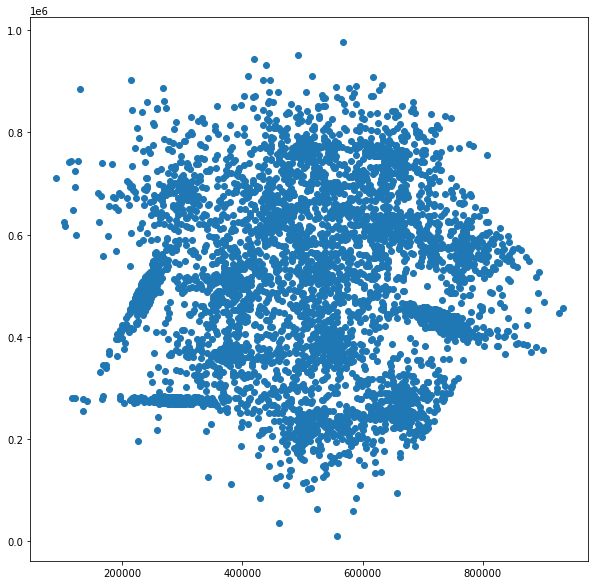

In [15]:
data = []

X = []
Y = []

for line in open('S2.txt'):
    line = line.rstrip().strip()
    datapoint = [int(i) for i in line.split()]
    X.append(datapoint[0])
    Y.append(datapoint[1])
    data.append(datapoint)

#print(len(data))
print(data)
plt.figure(figsize=(10,10))
plt.scatter(X,Y)
#print(X)
#print(Y)

## 11. perform k means clustering on S2.txt without using any library and plot the results

Text(0, 0.5, 'WCSS')

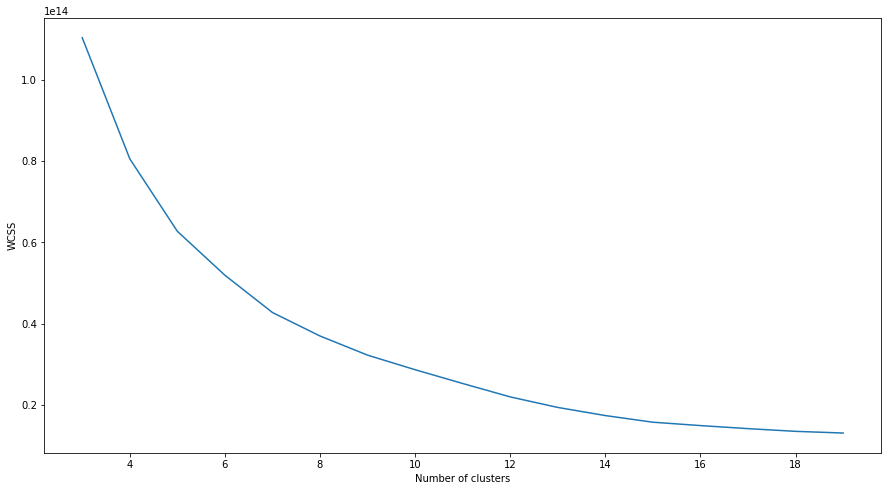

In [16]:
from sklearn.cluster import KMeans

wcss=[]

for i in range(3,20):
    kmeans = KMeans(i)
    kmeans.fit(data)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(3,20)
plt.figure(figsize=(15,8))
plt.plot(number_clusters,wcss)

plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

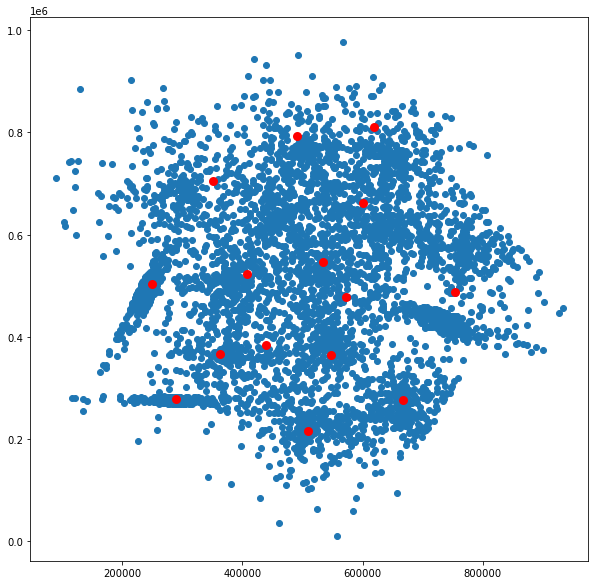

In [17]:
# manual implementation

data = np.array(data)
x_train, x_test = train_test_split(data,test_size=0.2)

class Own_K_Means:
    def __init__(self, k=15, max_iter=500):
        self.k = k
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]    

        for i in range(self.max_iter):
            self.cls = {}

            for i in range(self.k):
                self.cls[i] = []   

            for sample in data:
                distances = [] 
                for centroid in self.centroids:
                    temp = euclidean_distance(sample,self.centroids[centroid])
                    distances.append(temp) 
                min_dist = min(distances)
                classification = distances.index(min_dist)
                self.cls[classification].append(sample)

            prev_centroids = self.centroids

            for classification in self.cls:
                self.centroids[classification] = np.average(self.cls[classification],axis=0)

            stop = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                temp = (current_centroid-original_centroid)/original_centroid*100
                if np.sum(temp) > 0.001:
                    stop = False

            if stop:
                break

    def predict(self,data):
        distances = []
        for centroid in self.centroids:
                  temp = euclidean_distance(data,self.centroids[centroid])
                  distances.append(temp)
        classification = distances.index(min(distances))
        return classification

model = Own_K_Means()
model.fit(x_train)

plt.figure(figsize=(10,10))
plt.scatter(X,Y)  

for centroid in model.centroids:
    plt.scatter(model.centroids[centroid][0], model.centroids[centroid][1], color="red", linewidths=3)

plt.show()

## 12. perform k means clustering on S2.txt using sklearn library and plot the results

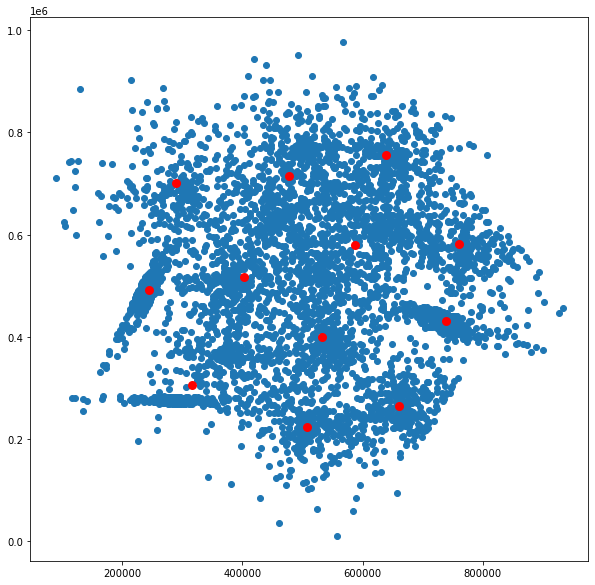

In [18]:
# sklearn implementation 

kmeans = KMeans(n_clusters=12)
kmeans.fit(data)

centers = kmeans.cluster_centers_
plt.figure(figsize=(10,10))
plt.scatter(X,Y)
plt.scatter(centers[:, 0], centers[:, 1], c='red', linewidths=3)

##### Reference:

https://www.geeksforgeeks.org/ml-classification-vs-clustering/

https://www.analyticssteps.com/blogs/how-does-k-nearest-neighbor-works-machine-learning-classification-problem

https://www.analyticsvidhya.com/blog/2020/10/a-simple-explanation-of-k-means-clustering/

https://towardsdatascience.com/9-distance-measures-in-data-science-918109d069fa